In [565]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import scipy as sp

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [566]:
df_train = pd.read_csv("Loan Prediction/train.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [567]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [568]:
df_train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002555,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Let us fill in all the missing values before checking which factors heavily influence loan approvals

In [569]:
df_train['Gender'].isnull().value_counts()

False    601
True      13
Name: Gender, dtype: int64

In [570]:
df_train['Gender'] = df_train['Gender'].fillna('Male')


In [571]:
df_train['Gender'].isnull().value_counts()

False    614
Name: Gender, dtype: int64

In [572]:
df_train['Married'].isnull().value_counts()

False    611
True       3
Name: Married, dtype: int64

In [573]:
df_train['Married'] = df_train['Married'].fillna('Yes')
df_train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002555,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,345,480,500,233,422


In [574]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [575]:
df_train['Self_Employed'] = df_train['Self_Employed'].fillna('No')
df_train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,599,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002555,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,345,480,532,233,422


In [576]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [577]:
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean())
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,614.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,64.372489,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [578]:
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [579]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(1)
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,85.587325,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [580]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [581]:
df_train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,599,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002555,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,345,480,532,233,422


In [582]:
df_train['Dependents'] = df_train['Dependents'].fillna('0')
df_train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002555,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [583]:
df_train.drop(['Loan_ID'],inplace=True, axis=1)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Now we can try to determine what factors influence loan approval

#1 Gender

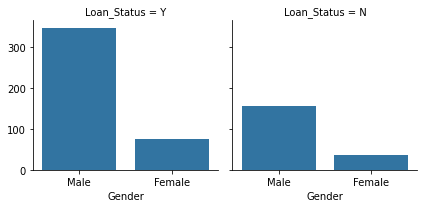

In [584]:
grid = sns.FacetGrid(df_train,col='Loan_Status')
grid.map(sns.countplot, 'Gender')

We can come to the conclusion that Gender does not influence the loan status as similar ratio of male and female get accepted/rejected

#2 Married


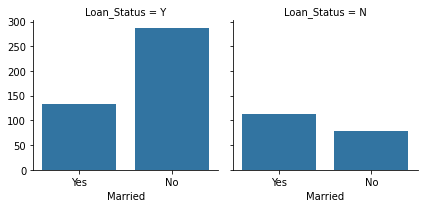

In [585]:
grid = sns.FacetGrid(df_train,col='Loan_Status')
grid.map(sns.countplot, 'Married')

We can see that loan is more likely to be granted if the person is not married, so we will consider this factor.

#3 Dependents

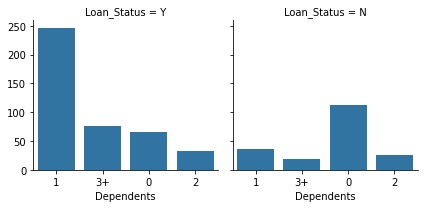

In [586]:
grid = sns.FacetGrid(df_train,col='Loan_Status')
grid.map(sns.countplot, 'Dependents')

Dependents is also a good factor to consider looking at the graph

#4 Education

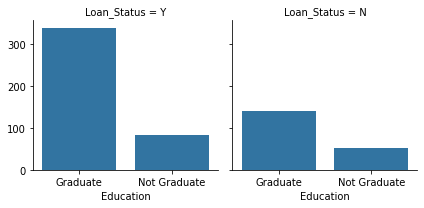

In [587]:
grid = sns.FacetGrid(df_train,col='Loan_Status')
grid.map(sns.countplot, 'Education')

Education does not seem like a good factor to consider

#4 Self Employed

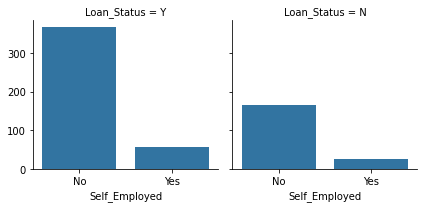

In [588]:
grid = sns.FacetGrid(df_train,col='Loan_Status')
grid.map(sns.countplot, 'Self_Employed')

similar to education, it does not seem like a good factor to consider

#5 Credit History

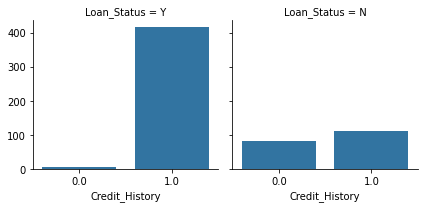

In [589]:
grid = sns.FacetGrid(df_train,col='Loan_Status')
grid.map(sns.countplot, 'Credit_History')

We will consider this as loans are most likely to be provided if you have a credit history

#6 Property Area

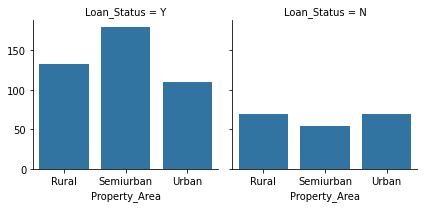

In [590]:
grid = sns.FacetGrid(df_train,col='Loan_Status')
grid.map(sns.countplot, 'Property_Area')

We will consider this feature as well

In [591]:
df_num = df_train.groupby('Loan_Status').median()
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,133.5,360.0,1.0
Y,3812.5,1239.5,128.0,360.0,1.0


Now that we know what data is useful let us clean the data by converting text data to numeric

In [592]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [593]:
gender_mapping = {'Male' : 0, 'Female' : 1}
df_train['Gender'].replace(gender_mapping, inplace=True)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [594]:
yesno_mapping = {'Yes' : 1, 'No' : 0}
df_train['Married'].replace(yesno_mapping, inplace=True)
df_train['Self_Employed'].replace(yesno_mapping, inplace=True)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,0,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [595]:
graduate_mapping = {'Graduate' : 0 , 'Not Graduate' : 1}
df_train['Education'].replace(graduate_mapping, inplace=True)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [596]:
area_mapping = {'Semiurban' : 0 , 'Urban' : 1 , 'Rural' : 2}
df_train['Property_Area'].replace(area_mapping, inplace=True)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,Y
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,N
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,Y


In [597]:
yn_mapping = {'Y' : 1 , 'N' : 0}
df_train['Loan_Status'].replace(yn_mapping, inplace=True)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1


In [598]:
dep_mapping = {'0' : 0 , '1' : 1 , '2' : 2 , '3+' : 3}
df_train['Dependents'].replace(dep_mapping, inplace=True)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1


In [599]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [600]:
df_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,0.912052,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [601]:
x = df_train.filter(['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'], axis = 1)
y = df_train['Loan_Status']

model1 = DecisionTreeClassifier()
model1.fit(x , y)
rsq1 =  model1.score(x,y)
print(rsq1)

model2 = RandomForestClassifier()
model2.fit(x,y)
rsq2 =  model1.score(x,y)
print(rsq2)

1.0
1.0


In [602]:
df_test = pd.read_csv('Loan Prediction/test.csv')
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [603]:
df_test['Gender'] = df_test['Gender'].fillna('Male')
df_test['Dependents'] = df_test['Dependents'].fillna('0')
df_test['Self_Employed'] = df_test['Self_Employed'].fillna('No')
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean())
df_test['Credit_History'] = df_test['Credit_History'].fillna(1)
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())

In [604]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.839237
std,4910.685399,2334.232099,60.946040,64.620366,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [605]:
df_test.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,367,367,367,367,367,367
unique,367,2,2,4,2,2,3
top,LP002870,Male,Yes,0,Graduate,No,Urban
freq,1,297,233,210,283,330,140


In [606]:
gender_mapping = {'Male' : 0, 'Female' : 1}
df_test['Gender'].replace(gender_mapping, inplace=True)
yesno_mapping = {'Yes' : 1, 'No' : 0}
df_test['Married'].replace(yesno_mapping, inplace=True)
df_test['Self_Employed'].replace(yesno_mapping, inplace=True)
graduate_mapping = {'Graduate' : 0 , 'Not Graduate' : 1}
df_test['Education'].replace(graduate_mapping, inplace=True)
area_mapping = {'Semiurban' : 0 , 'Urban' : 1 , 'Rural' : 2}
df_test['Property_Area'].replace(area_mapping, inplace=True)
dep_mapping = {'0' : 0 , '1' : 1 , '2' : 2 , '3+' : 3}
df_test['Dependents'].replace(dep_mapping, inplace=True)

df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,0,0,5720,0,110.0,360.0,1.0,1
1,LP001022,0,1,1,0,0,3076,1500,126.0,360.0,1.0,1
2,LP001031,0,1,2,0,0,5000,1800,208.0,360.0,1.0,1
3,LP001035,0,1,2,0,0,2340,2546,100.0,360.0,1.0,1
4,LP001051,0,0,0,1,0,3276,0,78.0,360.0,1.0,1


In [607]:
x_new = df_test.filter(['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'], axis = 1)
y_pred1 = model1.predict(x_new)

y_pred2 = model2.predict(x_new)


In [608]:
sc1 = model1.score(x_new , y_pred1)
sc2 = model1.score(x_new , y_pred2)
print(sc1 , sc2)

1.0 0.8119891008174387
